In [2]:
import pandas as pd
import xml.etree.ElementTree as ET
import re
import os

def clean_invalid_xml_chars(filepath):
    with open(filepath, 'r', encoding='utf-8') as file:
        content = file.read()
    # Escapa caracteres conflictivos solo dentro de BODY
    content = re.sub(r'<BODY>(.*?)</BODY>', 
                     lambda m: f"<BODY>{m.group(1).replace('&', '&amp;').replace('<', '&lt;').replace('>', '&gt;')}</BODY>", 
                     content, 
                     flags=re.DOTALL)
    return content

def parse_chatlog(xml_file):
    try:
        content = clean_invalid_xml_chars(xml_file)
        root = ET.fromstring(content)
        predator_usernames = [sn.findtext('USERNAME') for sn in root.findall('PREDATOR/SCREENNAME')]
        victim_usernames = [sn.findtext('USERNAME') for sn in root.findall('VICTIM/SCREENNAME')]
        posts = []
        for post in root.findall('POST'):
            username = post.findtext("USERNAME")
            role = 'predator' if username in predator_usernames else 'victim' if username in victim_usernames else 'desconocido'
            post_data = {
                'username' : username,
                'datetime' : post.findtext("DATETIME"),
                'body' : post.findtext('BODY'),
                'role' : role
            }
            posts.append(post_data)
        return pd.DataFrame(posts)
    except ET.ParseError:
        print(f"Error al procesar {xml_file}")
        return pd.DataFrame()

In [3]:
#Creamos el DataFrame
df = parse_chatlog("GeneralData/asian_kreationz.xml")
df

,username,datetime,body,role
0,,,"january 6, 2007",desconocido
1,asian_kreationz,(3:56:13 pm),hi,predator
2,torn_angel_2005,(3:57:10 pm),hey,victim
3,asian_kreationz,(3:57:20 pm),hello,predator
4,asian_kreationz,(3:57:30 pm),howu doin,predator
...,...,...,...,...
970,torn_angel_2005,(10:27:53 pm),310-923-8191 ?,victim
971,torn_angel_2005,(10:27:56 pm),ok,victim
972,asian_kreationz,(10:28:00 pm),yup,predator
973,torn_angel_2005,(10:28:01 pm),cya!,victim


In [4]:
# Ruta de tu carpeta con los XMLs
folder_path = "GeneralData"
all_dfs = []

for filename in os.listdir(folder_path):
    if filename.endswith(".xml"):
        full_path = os.path.join(folder_path, filename)
        df = parse_chatlog(full_path)
        if not df.empty:
            df['file'] = filename  # Para saber de qué archivo viene cada línea
            all_dfs.append(df)

# Combinar todos los DataFrames
combined_df = pd.concat(all_dfs, ignore_index=True)
print(combined_df.head())


Error al procesar GeneralData\jackenit_6in.xml
       username      datetime                                       body  \
0   armysgt1961  (7:02:01 pm)  im dennis us army soldier from cincinnati   
1  peekaboo1293  (7:02:30 pm)                        hi im becky from ky   
2   armysgt1961  (7:02:35 pm)                                 how old ru   
3  peekaboo1293  (7:02:42 pm)                              13 how old ru   
4   armysgt1961  (7:02:44 pm)                                   u single   

       role             file  
0  predator  ArmySgt1961.xml  
1    victim  ArmySgt1961.xml  
2  predator  ArmySgt1961.xml  
3    victim  ArmySgt1961.xml  
4  predator  ArmySgt1961.xml  


In [4]:
combined_df.tail()

,username,datetime,body,role,file
65339,wulfker_dragonslayer,01/20/07 1:29:08 PM,"ok baby, ill be on the road then",predator,Wulfker_Dragonslayer.xml
65340,13 year old girl,01/20/07 1:29:16 PM,okay luv u!! so much!!,victim,Wulfker_Dragonslayer.xml
65341,wulfker_dragonslayer,01/20/07 1:29:26 PM,me too baby,predator,Wulfker_Dragonslayer.xml
65342,13 year old girl,01/20/07 1:29:29 PM,bye,victim,Wulfker_Dragonslayer.xml
65343,wulfker_dragonslayer,01/20/07 1:29:37 PM,bye,predator,Wulfker_Dragonslayer.xml


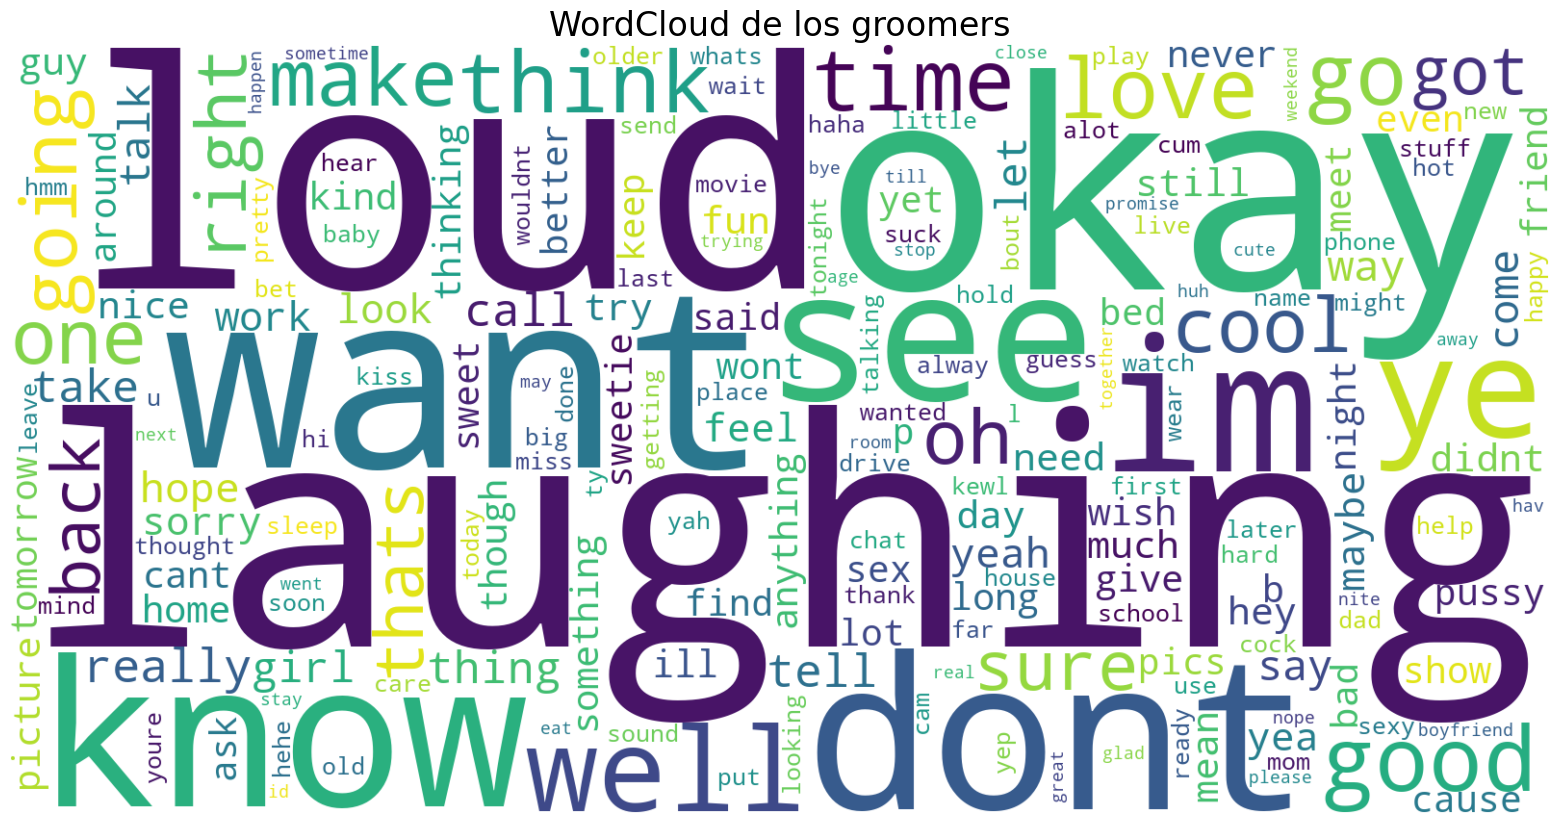

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

# Une todos los textos del cuerpo de los mensajes en una sola cadena
combined_df['body'] = combined_df['body'].apply(normalize_text)
predator_text = ' '.join(combined_df[combined_df['role'] == 'predator']['body'].dropna().astype(str))

predator_text = predator_text.lower()

stop_words = set(stopwords.words('english'))

predator_text = re.sub(r'\d+', '', predator_text)
predator_text = re.sub(r'[^\w\s]', '', predator_text)

palabras = [word for word in predator_text.split() if word not in stop_words]

# Crea el objeto WordCloud
wordcloud = WordCloud(width=1600, height=800, background_color='white', collocations=False).generate(' '.join(palabras))

# Mostrar el WordCloud
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud de los groomers", fontsize=24)
plt.show()

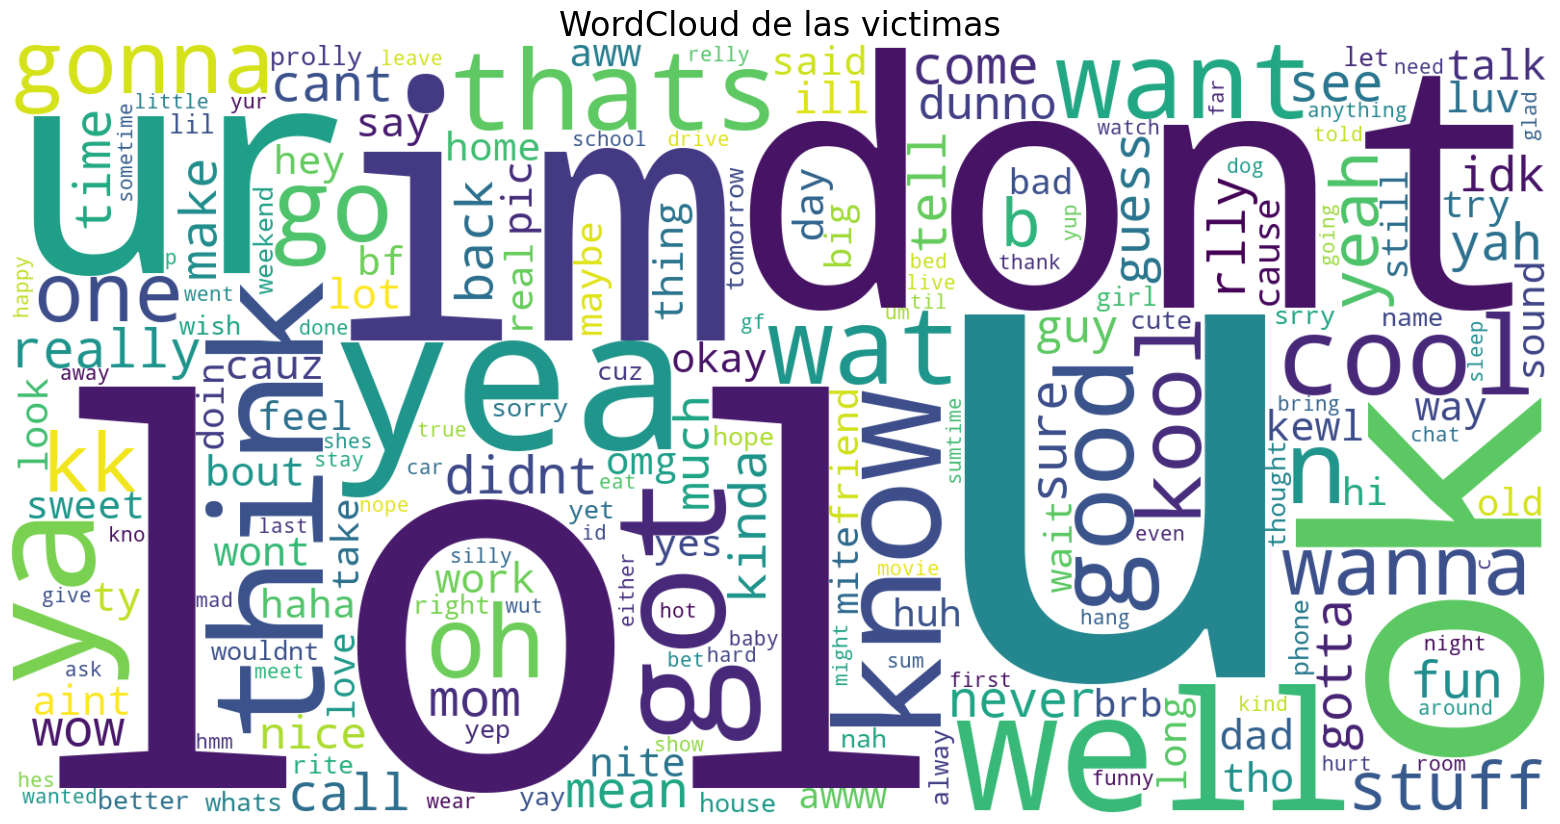

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

# Une todos los textos del cuerpo de los mensajes en una sola cadena
victim_text = ' '.join(combined_df[combined_df['role'] == 'victim']['body'].dropna().astype(str))

victim_text = victim_text.lower()

stop_words = set(stopwords.words('english'))

victim_text = re.sub(r'\d+', '', victim_text)
victim_text = re.sub(r'[^\w\s]', '', victim_text)

palabras = [word for word in victim_text.split() if word not in stop_words]

# Crea el objeto WordCloud
wordcloud = WordCloud(width=1600, height=800, background_color='white', collocations=False).generate(' '.join(palabras))

# Mostrar el WordCloud
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud de las victimas", fontsize=24)
plt.show()

Se ha visualizado varios "Slangs" que usan tanto los groomers como las victimas, por lo que se ha creado un diccionario para poder entender mejor las palabras usadas y pasarlas a palabras mas formales

In [8]:
import re

replacement_dict = {
    r"\bluv\b": "love",
    r"\bu\b": "you",
    r"\bru\b": "are you",
    r"\br u\b": "are you",
    r"\bya\b": "you",
    r"\byr\b": "your",
    r"\bur\b": "your",
    r"\br\b": "are",
    r"\bim\b": "i'm",
    r"\bidk\b": "i don't know",
    r"\bc\b": "see",
    r"\bc u\b": "see you",
    r"\bcya\b": "see you",
    r"\bbtw\b": "by the way",
    r"\bomg\b": "oh my god",
    r"\bthx\b": "thanks",
    r"\bpls\b": "please",
    r"\bplz\b": "please",
    r"\blol\b": "laughing out loud",
    r"\blmao\b": "laughing my ass off",
    r"\bwtf\b": "what the fuck",
    r"\bwth\b": "what the hell",
    r"\bomw\b": "on my way",
    r"\bl8r\b": "later",
    r"\bgr8\b": "great",
    r"\bmsg\b": "message",
    r"\btxt\b": "text",
    r"\bpic\b": "picture",
    r"\bttyl\b": "talk to you later",
    r"\bbrb\b": "be right back",
    r"\bafk\b": "away from keyboard",
    r"\bbf\b": "boyfriend",
    r"\bgf\b": "girlfriend",
    r"\bwanna\b": "want to",
    r"\bgonna\b": "going to",
    r"\bgotta\b": "got to",
    r"\bk\b": "okay",
    r"\bok\b": "okay",
    r"\bcuz\b": "because",
    r"\bcoz\b": "because",
    r"\btho\b": "though",
    r"\btho\b": "though",
    r"\btho\b": "though",
    r"\bdat\b": "that",
    r"\bda\b": "the",
    r"\bdis\b": "this",
    r"\bdem\b": "them",
    r"\bain't\b": "is not",
    r"\bgotcha\b": "got you",
    r"\bsorta\b": "sort of",
    r"\bkinda\b": "kind of",
    r"\bdunno\b": "don't know",
    r"\btryna\b": "trying to",
    r"\blemme\b": "let me",
    r"\bgimme\b": "give me",
    r"\bwhatcha\b": "what are you",
    r"\bill\b": "i will",
}

def normalize_text(text):
    text = text.lower()
    for pattern, replacement in replacement_dict.items():
        text = re.sub(pattern, replacement, text)
    return text


In [54]:
# DataFrame de ejemplo con texto informal
DataFrame = parse_chatlog("GeneralData/ArmySgt1961.xml")

DataFrame['normalized_body'] = DataFrame['body'].apply(normalize_text)
# Mostrar resultados
print(DataFrame)


        username      datetime                                       body  \
0    armysgt1961  (7:02:01 pm)  im dennis us army soldier from cincinnati   
1   peekaboo1293  (7:02:30 pm)                        hi im becky from ky   
2    armysgt1961  (7:02:35 pm)                                 how old ru   
3   peekaboo1293  (7:02:42 pm)                              13 how old ru   
4    armysgt1961  (7:02:44 pm)                                   u single   
..           ...           ...                                        ...   
91  peekaboo1293    7:27:10 PM              (incoming phone number given)   
92   armysgt1961    7:27:37 PM                                       name   
93  peekaboo1293    7:27:58 PM                     boo real name is becky   
94  peekaboo1293    8:38:52 PM                                  where r u   
95                (8:39:00 pm)                   armysgt1961 disconnected   

           role                             normalized_body  
0      predat

In [55]:
DataFrame['normalized_body']

0     i'm dennis us army soldier from cincinnati
1                           hi i'm becky from ky
2                                how old are you
3                             13 how old are you
4                                     you single
                         ...                    
91                 (incoming phone number given)
92                                          name
93                        boo real name is becky
94                                 where are you
95                      armysgt1961 disconnected
Name: normalized_body, Length: 96, dtype: object

Descargar nombres en ingles comunes

In [12]:
import nltk
nltk.download('names')

[nltk_data] Downloading package names to
[nltk_data]     C:\Users\Gabriel\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\names.zip.


True

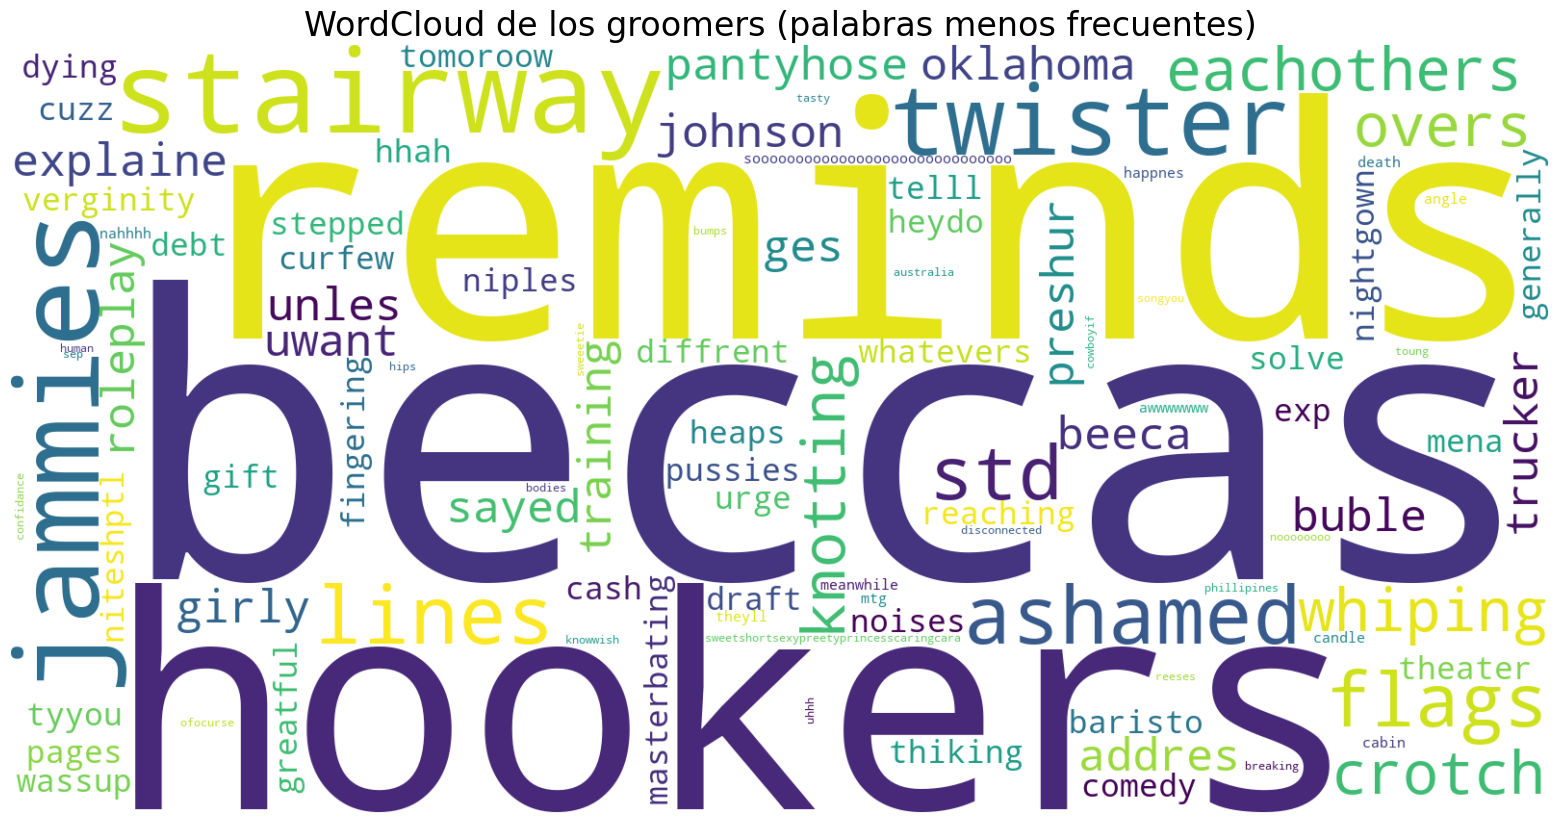

In [13]:
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords, names
import nltk


#Se tienen los nombres de personas para filtrarlos del wordcloud
nombres_ingles = set(name.lower() for name in names.words())

# Normaliza los textos
combined_df['body'] = combined_df['body'].apply(normalize_text)

# Une todos los textos del rol 'predator'
predator_text = ' '.join(combined_df[combined_df['role'] == 'predator']['body'].dropna().astype(str))
predator_text = predator_text.lower()
predator_text = re.sub(r'\d+', '', predator_text)
predator_text = re.sub(r'[^\w\s]', '', predator_text)

# Elimina stopwords
stop_words = set(stopwords.words('english'))
palabras = [word for word in predator_text.split() if word not in stop_words]

# Filtra palabras
palabras = [
    word for word in predator_text.split()
    if word not in stop_words and word not in nombres_ingles
]

# Cuenta las palabras y selecciona las menos frecuentes
conteo = Counter(palabras)
menos_frecuentes = {word: freq for word, freq in conteo.items() if freq >= 2}
ultimas_100 = dict(Counter(menos_frecuentes).most_common()[:-101:-1])  # últimas 100

# Crea y muestra el WordCloud
wordcloud = WordCloud(width=1600, height=800, background_color='white', collocations=False)
wordcloud.generate_from_frequencies(ultimas_100)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud de los groomers (palabras menos frecuentes)", fontsize=24)
plt.show()